<a href="https://colab.research.google.com/github/hjmcphail76/Lidar-FRC-AI-Robot-Detection/blob/main/YOLOv8_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps:

-Gather training data with the python program
-Upload and label images using Roboflow
-Download the dataset with the TXT YOLOv8 format
-upload here and train model

In [ ]:
!unzip -q /content/Lidar_Detection_Test_1.v1-roboflow-instant-1--eval-.yolov8.zip -d lidar-data #paste zip directory to unzip

In [ ]:
!pip install --upgrade ultralytics

# 2️⃣ Imports
from ultralytics import YOLO
import os

# 3️⃣ Paths (update to your local dataset folder)
data_dir = 'lidar-data'  # root folder after unzipping Roboflow export

In [ ]:
yaml_path = os.path.join(data_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(f"""
path: {data_dir}
train: train
val: valid
test: test
names:
  0: box
""")

# 5️⃣ Initialize YOLOv8 model (pretrained backbone)
model = YOLO('yolov8n.pt')  # 'n' for nano, 's' for small, 'm' for medium, 'l' for large

# 6️⃣ Train locally
model.train(
    data=yaml_path,
    epochs=100,
    imgsz=640,
    batch=4,        # adjust depending on GPU/CPU memory
    device='0',     # 'cpu' for CPU, '0' for GPU 0 in Colab
    project='runs/train',
    name='yolov8_lidar',
    augment = True,
)




image 1/1 /content/output_image_pil3.png: 480x640 1 box, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


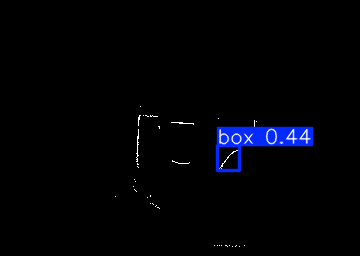

In [ ]:
# 7️⃣ After training, local weights will be in:
# runs/train/yolov8_lidar/weights/best.pt

# 8️⃣ Local inference example
results = model.predict(source='output_image_pil3.png')  # replace with your test image
results[0].show()  # visualize predictions

In [ ]:
from google.colab import files

files.download('/content/runs/train/yolov8_lidar/weights/best.pt') #Downloads the best weights to replace in the local python program.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>